<a href="https://colab.research.google.com/github/drewkostelecky/lab-2-drewkostelecky/blob/main/DATA_301_Lab_2A_Drew_Kostelecky_Andrew_Chan_Nicholas_Tan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `https://dlsun.github.io/pods/data/sharktank.csv`. Read in the data into a Pandas `DataFrame`.



In [2]:
df_shark = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")
df_shark.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
# YOUR CODE HERE
df_shark["Corcoran"].fillna(0, inplace=True)
df_shark["Cuban"].fillna(0, inplace=True)
df_shark["Greiner"].fillna(0, inplace=True)
df_shark["Herjavec"].fillna(0, inplace=True)
df_shark["John"].fillna(0, inplace=True)
df_shark["O'Leary"].fillna(0, inplace=True)
df_shark["Harrington"].fillna(0, inplace=True)
df_shark["Guest"].fillna(0, inplace=True)
df_shark.head()


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
# YOUR CODE HERE
df_shark["Amount"] = df_shark["Amount"].str.replace("$", "")
df_shark["Amount"] = df_shark["Amount"].str.replace(",", "")
df_shark["Amount"] = df_shark["Amount"].astype(float)
df_shark["Equity"] = df_shark["Equity"].str.replace("%", "")
df_shark["Equity"] = df_shark["Equity"].astype(float)
df_shark["Equity"] = df_shark["Equity"] / 100
df_shark.head()

<ipython-input-4-2b122fb0b274>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_shark["Amount"] = df_shark["Amount"].str.replace("$", "")


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [5]:
# YOUR CODE HERE

# Turn 0.0 in equity into NA to avoid infinity
e = df_shark["Equity"]
e.mask(e == 0.0, inplace=True)
df_shark["Equity (Excludes Zero)"] = e

df_shark["company_value"] = df_shark["Amount"] / df_shark["Equity (Excludes Zero)"]
df_shark.loc[df_shark["company_value"].idxmax()]

Season                                                                  6.0
No. in series                                                          11.0
Company                                                                Zipz
Deal                                                                    Yes
Industry                                                  Food and Beverage
Entrepreneur Gender                                                    Male
Amount                                                            2500000.0
Equity                                                                  0.1
Corcoran                                                                0.0
Cuban                                                                   0.0
Greiner                                                                 0.0
Herjavec                                                                0.0
John                                                                    0.0
O'Leary     

In [6]:
df_shark.loc[df_shark["Amount"].idxmax()]

Season                                                                  6.0
No. in series                                                          27.0
Company                                                              AirCar
Deal                                                                    Yes
Industry                                                    Green/CleanTech
Entrepreneur Gender                                                    Male
Amount                                                            5000000.0
Equity                                                                  0.5
Corcoran                                                                0.0
Cuban                                                                   0.0
Greiner                                                                 0.0
Herjavec                                                                1.0
John                                                                    0.0
O'Leary     

**YOUR EXPLANATION HERE**

The company that is worth the most based on the equity and amount calculation is Zips, with a total worth of \$25,000,000. This is different than the company that recieved the largest total investment which was AirCar at \$5,000,000. When I initially did the calculation, the company Wall DoctorRx showed as an infinite company value because an investment was made for 0% equity. To account for this, I created a new column that changed 0 equity to NaN.


## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [7]:
# ENTER CODE HERE.
sharks = ["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington", "Guest"]
df_shark["Investors"] = df_shark[sharks].sum(axis=1)

df_investments = df_shark[sharks].multiply(df_shark['Amount'] / df_shark['Investors'], axis=0)
totals = df_investments[sharks].sum(axis=0)
max_total = totals.idxmax()

totals

Corcoran       4912500.0
Cuban         17817500.0
Greiner        8170000.0
Herjavec      16297500.0
John           8154000.0
O'Leary        7952500.0
Harrington      800000.0
Guest           400000.0
dtype: float64

**YOUR EXPLANATION HERE**

Cuban invested the most with \$17,817,500 over the six seasons.

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

In [8]:
industry_group = df_shark.groupby(["Industry"])
industry_deal_group = industry_group["Deal"].value_counts(normalize=True).unstack().sort_values(by="Yes")[["Yes", "No"]]
industry_deal_group

Deal,Yes,No
Industry,,
Business Services,0.230769,0.769231
Uncertain / Other,0.384615,0.615385
Pet Products,0.411765,0.588235
Software / Tech,0.454545,0.545455
Fashion / Beauty,0.462366,0.537634
Consumer Products,0.526316,0.473684
Children / Education,0.527273,0.472727
Lifestyle / Home,0.528571,0.471429
Food and Beverage,0.538462,0.461538


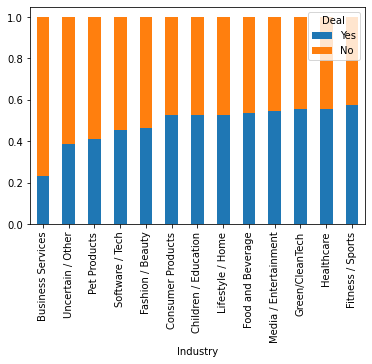

In [9]:
industry_deal_group.sort_values(by="Yes")[["Yes", "No"]].plot.bar(stacked=True)

**YOUR EXPLANATION HERE**

It's hard to say whether or not the sharks perfered a certain industry because it is unclear if the difference between the categories is statistically significant. We also cannot make a definitive conclusion that they perfered any industry over another because each industry has a different ammount of deals made and the porportional distribution could mask a potential preference. That being said, in the six seasons, they invested in Fitness/Sports at the highest rate of 57.5%. 

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2A - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.